In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import log_loss  


In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-null   object 
 7   perception_cannot_afford_insuranc

In [4]:
#drop ID column in train and test data
train_data.drop('ID', axis=1)
test_data.drop('ID', axis=1)

,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,zimbabwe,50.0,No,No,No,No,Yes,100.0,3600.0,7200.0,...,NaN,NaN,NaN,No,8.0,Never had,Never had,NaN,NaN,NaN
1,lesotho,36.0,Yes,Yes,No,Yes,Yes,900.0,400.0,900.0,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now
2,lesotho,25.0,Don’t know or N/A,No,No,Don't know,Don't know,5250.0,350.0,1000.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,No,Never had,Used to have but don't have now
3,malawi,25.0,Don’t know or N/A,Yes,No,No,Yes,485000.0,10000.0,20000.0,...,Never had,Never had,Never had,Yes,NaN,NaN,NaN,Yes,Have now,Never had
4,lesotho,47.0,No,Yes,No,Don't know,Don't know,97.0,500.0,2000.0,...,Used to have but don't have now,Have now,Have now,Yes,NaN,NaN,NaN,Yes,Used to have but don't have now,Used to have but don't have now
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,eswatini,29.0,Yes,Yes,No,No,Yes,600.0,1700.0,2000.0,...,Never had,Never had,Never had,NaN,11.0,Never had,Never had,NaN,Never had,Never had
2401,malawi,20.0,Don’t know or N/A,Don’t know or N/A,No,Don't know,Don't know,30000.0,20000.0,25000.0,...,Never had,Never had,Never had,No,4.0,NaN,NaN,Yes,NaN,NaN
2402,zimbabwe,26.0,Yes,Yes,No,Yes,Yes,3888.0,NaN,NaN,...,NaN,NaN,NaN,No,0.0,Have now,Have now,NaN,NaN,NaN
2403,eswatini,63.0,No,No,Yes,Yes,Yes,3500.0,1700.0,1200.0,...,Never had,Never had,Never had,NaN,4.0,Never had,Have now,NaN,Never had,Never had


Feature Engineering


FEATURE ENGINEERING - GETTING STARTED

💡 Let's create some new features to boost your model performance!

We'll demonstrate 2 powerful feature engineering techniques:

1️⃣ PROFIT MARGIN RATIO
----------------------------------------
Concept: How much profit does the business make relative to income?
Formula: (personal_income - business_expenses) / personal_income

✓ Created 'profit_margin' feature
  Train - Non-null values: 9338
  Test - Non-null values: 2322

Sample statistics:
count    9338.000000
mean       -0.200178
std         0.796198
min        -1.000000
25%        -1.000000
50%        -0.285714
75%         0.600000
max         1.000000
Name: profit_margin, dtype: float64

📊 Profit Margin by Target:
            mean    median       std
Target                              
High   -0.278023 -0.500000  0.762552
Low    -0.193241 -0.250000  0.800371
Medium -0.202494 -0.333333  0.792035


<Figure size 720x360 with 0 Axes>

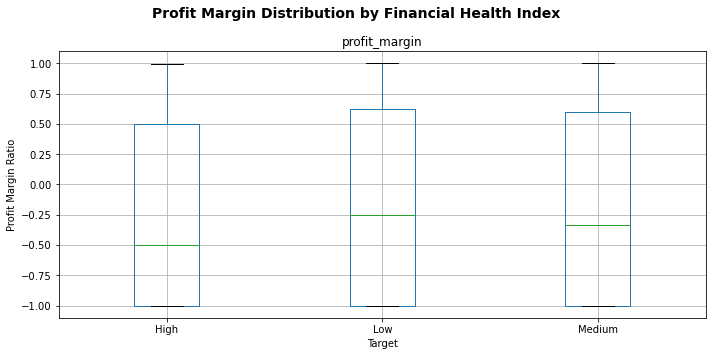


2️⃣ FINANCIAL ACCESS SCORE
----------------------------------------
Concept: How many formal financial services does the business use?
Includes: bank accounts, debit cards, internet banking, loans, insurance

✓ Created 'financial_access_score' feature
  Train - Non-null values: 8228
  Test - Non-null values: 2066

Sample statistics:
count    8228.000000
mean        0.189297
std         0.276240
min         0.000000
25%         0.000000
50%         0.000000
75%         0.333333
max         1.000000
Name: financial_access_score, dtype: float64

📊 Financial Access Score by Target:
            mean    median       std
Target                              
High    0.490086  0.400000  0.248168
Low     0.091164  0.000000  0.208255
Medium  0.372129  0.333333  0.292329


<Figure size 720x360 with 0 Axes>

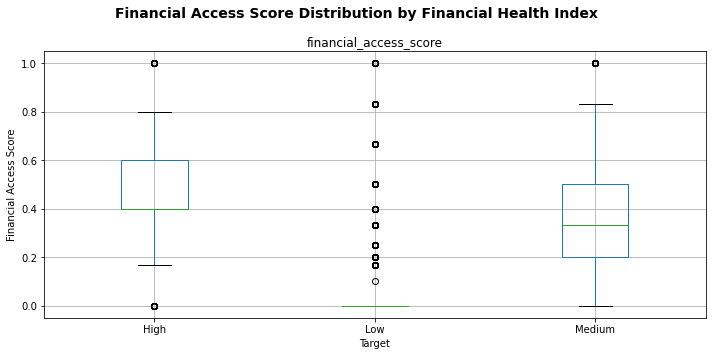


FEATURE ENGINEERING SUMMARY

✅ Successfully created 2 new features:

1. profit_margin:
   - Measures business profitability
   - Higher values = better financial performance
   - Useful for identifying financially healthy businesses

2. financial_access_score:
   - Measures access to formal financial services
   - Range: 0 (no access) to 1 (full access)
   - Reflects financial inclusion level

💡 MORE FEATURE IDEAS TO TRY:
   • Age bins (categorize owner_age into groups)
   • Income-to-expenses ratio
   • Business maturity (young vs established)
   • Risk perception score (combine attitude columns)
   • Country-specific features (encode regional patterns)
   • Insurance coverage index
   • Digital banking adoption flag

📝 NEXT STEPS:
   1. Add these features to your modeling pipeline
   2. Check feature importance after training
   3. Create more domain-specific features
   4. Test interaction features between variables
   5. Experiment with polynomial features for numerical data

🎯 Re

In [5]:
# ========================================
# 12. FEATURE ENGINEERING
# ========================================

print("\n" + "=" * 60)
print("FEATURE ENGINEERING - GETTING STARTED")
print("=" * 60)

print("\n💡 Let's create some new features to boost your model performance!")
print("\nWe'll demonstrate 2 powerful feature engineering techniques:")

# Create copies to preserve original data
train_fe = train_data.copy()
test_fe = test_data.copy()

# ----------------------------------------
# Feature 1: Profit Margin Ratio
# ----------------------------------------
print("\n1️⃣ PROFIT MARGIN RATIO")
print("-" * 40)
print("Concept: How much profit does the business make relative to income?")
print("Formula: (personal_income - business_expenses) / personal_income")

def create_profit_margin(df):
    """
    Calculate profit margin ratio for each business.
    This indicates financial efficiency and sustainability.
    """
    # Handle division by zero and missing values
    profit_margin = []
    
    for idx, row in df.iterrows():
        income = row.get('personal_income', np.nan)
        expenses = row.get('business_expenses', np.nan)
        
        # Check if both values exist and income is not zero
        if pd.notna(income) and pd.notna(expenses) and income != 0:
            margin = (income - expenses) / income
            # Cap extreme values
            margin = max(-1, min(margin, 1))  # Keep between -1 and 1
        else:
            margin = np.nan
        
        profit_margin.append(margin)
    
    return profit_margin

train_fe['profit_margin'] = create_profit_margin(train_fe)
test_fe['profit_margin'] = create_profit_margin(test_fe)

print(f"\n✓ Created 'profit_margin' feature")
print(f"  Train - Non-null values: {train_fe['profit_margin'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['profit_margin'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['profit_margin'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Profit Margin by Target:")
    print(train_fe.groupby('Target')['profit_margin'].agg(['mean', 'median', 'std']))
    
    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='profit_margin', by='Target', figsize=(10, 5))
    plt.suptitle('Profit Margin Distribution by Financial Health Index', 
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Profit Margin Ratio')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Feature 2: Financial Access Score
# ----------------------------------------
print("\n2️⃣ FINANCIAL ACCESS SCORE")
print("-" * 40)
print("Concept: How many formal financial services does the business use?")
print("Includes: bank accounts, debit cards, internet banking, loans, insurance")

def create_financial_access_score(df):
    """
    Calculate a composite score of financial service access.
    Higher score = better access to formal financial services.
    """
    financial_features = [
        'has_bank_account', 'has_loan_account', 'has_internet_banking',
        'has_debit_card', 'medical_insurance', 'funeral_insurance'
    ]
    
    # Available features in the dataset
    available_features = [col for col in financial_features if col in df.columns]
    
    scores = []
    for idx, row in df.iterrows():
        score = 0
        valid_features = 0
        
        for feature in available_features:
            value = row.get(feature, np.nan)
            
            if pd.notna(value):
                valid_features += 1
                # Check for positive responses
                if value in ['Yes', 'Have now', 'have now']:
                    score += 1
                elif value in ['Used to have but don\'t have now', 'used to have']:
                    score += 0.5  # Partial credit for past access
        
        # Normalize by number of valid features checked
        if valid_features > 0:
            normalized_score = score / valid_features
        else:
            normalized_score = np.nan
        
        scores.append(normalized_score)
    
    return scores

train_fe['financial_access_score'] = create_financial_access_score(train_fe)
test_fe['financial_access_score'] = create_financial_access_score(test_fe)

print(f"\n✓ Created 'financial_access_score' feature")
print(f"  Train - Non-null values: {train_fe['financial_access_score'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['financial_access_score'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['financial_access_score'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Financial Access Score by Target:")
    print(train_fe.groupby('Target')['financial_access_score'].agg(['mean', 'median', 'std']))
    
    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='financial_access_score', by='Target', figsize=(10, 5))
    plt.suptitle('Financial Access Score Distribution by Financial Health Index', 
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Financial Access Score')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Summary
# ----------------------------------------
print("\n" + "=" * 60)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 60)

print("\n✅ Successfully created 2 new features:")
print("\n1. profit_margin:")
print("   - Measures business profitability")
print("   - Higher values = better financial performance")
print("   - Useful for identifying financially healthy businesses")

print("\n2. financial_access_score:")
print("   - Measures access to formal financial services")
print("   - Range: 0 (no access) to 1 (full access)")
print("   - Reflects financial inclusion level")

print("\n💡 MORE FEATURE IDEAS TO TRY:")
print("   • Age bins (categorize owner_age into groups)")
print("   • Income-to-expenses ratio")
print("   • Business maturity (young vs established)")
print("   • Risk perception score (combine attitude columns)")
print("   • Country-specific features (encode regional patterns)")
print("   • Insurance coverage index")
print("   • Digital banking adoption flag")

print("\n📝 NEXT STEPS:")
print("   1. Add these features to your modeling pipeline")
print("   2. Check feature importance after training")
print("   3. Create more domain-specific features")
print("   4. Test interaction features between variables")
print("   5. Experiment with polynomial features for numerical data")

print("\n🎯 Remember: Good features can make a bigger difference than complex models!")

# Save engineered datasets (optional)
print("\n💾 Your engineered dataframes are ready:")
print(f"   • train_fe: {train_fe.shape}")
print(f"   • test_fe: {test_fe.shape}")

print("\n" + "=" * 60)

In [6]:
train_fe.columns

Index(['ID', 'country', 'owner_age', 'attitude_stable_business_environment',
       'attitude_worried_shutdown', 'compliance_income_tax',
       'perception_insurance_doesnt_cover_losses',
       'perception_cannot_afford_insurance', 'personal_income',
       'business_expenses', 'business_turnover', 'business_age_years',
       'motor_vehicle_insurance', 'has_mobile_money',
       'current_problem_cash_flow', 'has_cellphone', 'owner_sex',
       'offers_credit_to_customers', 'attitude_satisfied_with_achievement',
       'has_credit_card', 'keeps_financial_records',
       'perception_insurance_companies_dont_insure_businesses_like_yours',
       'perception_insurance_important', 'has_insurance',
       'covid_essential_service', 'attitude_more_successful_next_year',
       'problem_sourcing_money', 'marketing_word_of_mouth', 'has_loan_account',
       'has_internet_banking', 'has_debit_card', 'future_risk_theft_stock',
       'business_age_months', 'medical_insurance', 'funeral_insura

Feature Selection

In [7]:
# Define x and y 
X = train_fe.drop(columns=['Target', 'ID'])
y = train_fe['Target']



X_test = test_fe.drop(columns=['ID'])

In [8]:
def change_object_to_cat(df):
  # changes objects columns to category and returns dataframe and list

  df = df.copy()
  list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
  for str_obj_col in list_str_obj_cols:
      df[str_obj_col] = df[str_obj_col].astype("category")

  return df,list_str_obj_cols
X, cat_list = change_object_to_cat(X)

X

,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,profit_margin,financial_access_score
0,eswatini,63.0,Yes,No,No,No,Yes,3000.0,6000.0,7000.0,...,Never had,NaN,6.0,Never had,Used to have but don’t have now,NaN,Never had,Never had,-1.000000,0.000000
1,zimbabwe,39.0,No,Yes,Yes,No,Yes,NaN,NaN,NaN,...,NaN,No,3.0,Never had,Never had,NaN,NaN,NaN,NaN,0.000000
2,malawi,34.0,Don’t know or N/A,No,No,Don't know,Yes,30000.0,6000.0,13000.0,...,Never had,Yes,NaN,NaN,NaN,Yes,NaN,NaN,0.800000,0.000000
3,malawi,28.0,Yes,No,No,No,No,180000.0,60000.0,30000.0,...,Never had,No,NaN,NaN,NaN,Yes,Never had,Have now,0.666667,0.000000
4,zimbabwe,43.0,Yes,No,No,Yes,Yes,50.0,2400.0,1800.0,...,NaN,No,0.0,Never had,Never had,Yes,NaN,NaN,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,lesotho,31.0,Yes,No,No,Don't know,Don't know,2000.0,800.0,500.0,...,NaN,NaN,NaN,NaN,NaN,No,Have now,Never had,0.600000,NaN
9614,malawi,64.0,Don’t know or N/A,Don’t know or N/A,Yes,No,No,10000000.0,5000000.0,200000000.0,...,Have now,Yes,NaN,NaN,NaN,No,NaN,NaN,0.500000,0.333333
9615,zimbabwe,43.0,Yes,No,No,Yes,No,450.0,NaN,NaN,...,NaN,No,8.0,Have now,Have now,NaN,NaN,NaN,NaN,1.000000
9616,zimbabwe,38.0,Yes,Yes,No,No,Yes,2000.0,NaN,NaN,...,NaN,No,0.0,Never had,Never had,NaN,NaN,NaN,NaN,0.000000


In [16]:
# 1. Identify your columns
num_cols = X.select_dtypes(include=['float64']).columns
cat_cols = X.select_dtypes(include=['category']).columns

# 2. Define the Numerical Transformer
# Median is safer for financial data; Scaling is essential for most models
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 3. Define the Categorical Transformer
# handle_unknown='ignore' prevents the model from crashing if the test set 
# has a category the training set never saw.
# Updated for older Scikit-Learn versions
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output =False))
])

# 4. Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)


print(f"Original shape: {X.shape}")


Original shape: (9618, 39)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
# pipelines

#logistic regression
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),('model', LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced', multi_class= 'multinomial'))
])

# decision tree classifier
dec_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),('model', DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced'))
])  

# random forest classifier
rand_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),('model', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])  

In [19]:
#cross-validation with log loss
# stratified-k-folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# creating a model dictionary
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dec_tree,
    'Random Forest': rand_forest
}

results = []

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    roc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr')


    results.append({
        'Model': name,
        'Accuracy': acc.mean(),
        'F1 Score': f1.mean(),
        'ROC AUC': roc.mean()
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.818051  0.731608  0.927375
1        Decision Tree  0.819819  0.738690  0.910791
2        Random Forest  0.877209  0.797697  0.946775


In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=train_fe[['country', 'Target']]
)

In [22]:
from sklearn.metrics import f1_score

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    print(f"{name} F1 Macro: {f1:.4f}")



Logistic Regression F1 Macro: 0.7192
Decision Tree F1 Macro: 0.7476
Random Forest F1 Macro: 0.7989


In [23]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y,
                             cv=5,
                             scoring='f1_macro')
    print(f"{name} CV F1 Macro: {scores.mean():.4f}")


Logistic Regression CV F1 Macro: 0.7296
Decision Tree CV F1 Macro: 0.7320
Random Forest CV F1 Macro: 0.8067


In [24]:
best_model = rand_forest  

best_model.fit(X, y)   # fit on FULL training data


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['owner_age', 'personal_income', 'business_expenses',
       'business_turnover', 'business_age_years', 'business_age_months',
       'profit_margin', 'financial_access_score'],
      dtype='object')),
                                                 ('cat',
                                                  Pi...
       'problem_sourcing_money', 'marketing_word_of_mouth', 'has_loan_account',
       'has_internet_banking', 'has_debit_card', 'future_risk_theft_stock',
       'medical_insurance', 'funeral_insurance', 'motivation_make_more_money',
       'uses_friends_family_savings', 'uses_informal_lender'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [26]:
test_preds = best_model.predict(X_test)
test_preds

array(['Low', 'Low', 'Low', ..., 'Medium', 'Medium', 'Low'], dtype=object)

In [27]:
pred_df3 = pd.DataFrame({
    "ID": test_fe["ID"],
    "Target": test_preds
})

pred_df3.to_csv("submission4.csv", index=False)


In [30]:
pred_df3

,ID,Target
0,ID_5EGLKX,Low
1,ID_4AI7RE,Low
2,ID_V9OB3M,Low
3,ID_6OI9DI,Low
4,ID_H2TN8B,Low
...,...,...
2400,ID_FX7XJZ,Low
2401,ID_XAL1LX,Low
2402,ID_UHBP0F,Medium
2403,ID_GKIKR2,Medium
